### Stock Market Prediction And Forecasting Using Stacked LSTM

In [27]:
### Keras and Tensorflow >2.0

In [28]:
### Data Collection
import pandas_datareader as pdr
key=""

In [29]:
import pandas as pd

In [30]:
df=pd.read_csv('/content/newsp.csv')

In [ ]:
df.head()

,date,open,high,low,close,volume,Name
0,04-05-22,15.07,15.12,14.63,14.75,8407500,AAL
1,03-05-22,14.89,15.01,14.26,14.46,8882000,AAL
2,02-05-22,14.45,14.51,14.10,14.27,8126000,AAL
3,01-05-22,14.30,14.94,14.25,14.66,10259500,AAL
4,30-04-22,14.94,14.96,13.16,13.99,31879900,AAL


In [ ]:
df.tail()

,date,open,high,low,close,volume,Name
1253,31-01-18,53.08,54.71,53.00,54.32,5962937,AAL
1254,01-02-18,54.00,54.64,53.59,53.88,3623078,AAL
1255,02-02-18,53.49,53.99,52.03,52.10,5109361,AAL
1256,05-02-18,51.99,52.39,49.75,49.76,6878284,AAL
1257,06-02-18,49.32,51.50,48.79,51.18,6782480,AAL


In [31]:
df1=df.reset_index()['close']

In [32]:
df1

0       14.75
1       14.46
2       14.27
3       14.66
4       13.99
        ...  
1253    54.32
1254    53.88
1255    52.10
1256    49.76
1257    51.18
Name: close, Length: 1258, dtype: float64

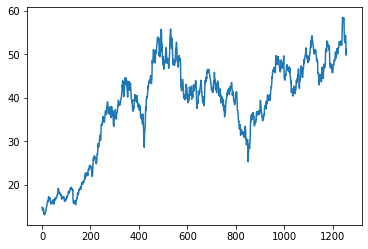

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [ ]:
import numpy as np

In [ ]:
df1

0       14.75
1       14.46
2       14.27
3       14.66
4       13.99
        ...  
1253    54.32
1254    53.88
1255    52.10
1256    49.76
1257    51.18
Name: close, Length: 1258, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.03806381]
 [0.03168317]
 [0.02750275]
 ...
 [0.85984598]
 [0.80836084]
 [0.83960396]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(817, 441)

In [ ]:
train_data

array([[0.03806381],
       [0.03168317],
       [0.02750275],
       [0.03608361],
       [0.02134213],
       [0.03256326],
       [0.02728273],
       [0.00682068],
       [0.00770077],
       [0.01210121],
       [0.        ],
       [0.00528053],
       [0.00858086],
       [0.0090209 ],
       [0.0129813 ],
       [0.01936194],
       [0.02266227],
       [0.03410341],
       [0.03960396],
       [0.04180418],
       [0.04642464],
       [0.05456546],
       [0.06358636],
       [0.07106711],
       [0.06512651],
       [0.07194719],
       [0.08272827],
       [0.09262926],
       [0.08756876],
       [0.08448845],
       [0.07876788],
       [0.07678768],
       [0.07986799],
       [0.08690869],
       [0.08030803],
       [0.05984598],
       [0.05522552],
       [0.05874587],
       [0.05940594],
       [0.0620462 ],
       [0.0589659 ],
       [0.06072607],
       [0.06974697],
       [0.06864686],
       [0.05654565],
       [0.07370737],
       [0.0770077 ],
       [0.067

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 11s 302ms/step - loss: 0.0884 - val_loss: 0.0198
Epoch 2/100
12/12 [==============================] - 2s 200ms/step - loss: 0.0138 - val_loss: 0.0044
Epoch 3/100
12/12 [==============================] - 2s 192ms/step - loss: 0.0083 - val_loss: 0.0124
Epoch 4/100
12/12 [==============================] - 2s 189ms/step - loss: 0.0047 - val_loss: 0.0051
Epoch 5/100
12/12 [==============================] - 2s 177ms/step - loss: 0.0035 - val_loss: 0.0030
Epoch 6/100
12/12 [==============================] - 2s 177ms/step - loss: 0.0030 - val_loss: 0.0039
Epoch 7/100
12/12 [==============================] - 2s 188ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 8/100
12/12 [==============================] - 2s 176ms/step - loss: 0.0033 - val_loss: 0.0028
Epoch 9/100
12/12 [==============================] - 2s 181ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 10/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0029 - val_l

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.8.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

38.4608319204746

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

46.1989793449326

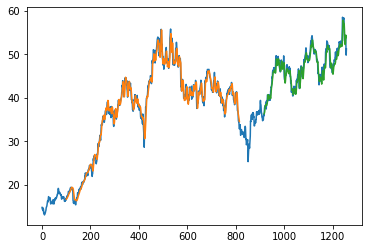

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

441

In [ ]:
len(train_data)

817

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.7298129812981298,
 0.7256325632563256,
 0.7104510451045104,
 0.68998899889989,
 0.7128712871287128,
 0.7320132013201319,
 0.7489548954895489,
 0.7630363036303631,
 0.7603960396039604,
 0.7443344334433444,
 0.7584158415841584,
 0.7584158415841584,
 0.7636963696369636,
 0.8248624862486247,
 0.8297029702970296,
 0.825962596259626,
 0.8422442244224422,
 0.8268426842684269,
 0.8803080308030802,
 0.8759075907590759,
 0.8719471947194719,
 0.873047304730473,
 0.8635863586358636,
 0.8591859185918591,
 0.8583058305830582,
 0.8468646864686467,
 0.856105610561056,
 0.8352035203520352,
 0.8565456545654566,
 0.8360836083608361,
 0.7830583058305829,
 0.7599559955995598,
 0.753135313531353,
 0.7436743674367436,
 0.7661166116611662,
 0.7555555555555555,
 0.7575357535753575,
 0.7588558855885588,
 0.7357535753575357,
 0.7337733773377337,
 0.7205720572057206,
 0.7216721672167217,
 0.7199119911991199,
 0.7214521452145215,
 0.7518151815181517,
 0.7625962596259626,
 0.7562156215621563,
 0.7628162816281627

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.83318985]
101
1 day input [0.72563256 0.71045105 0.689989   0.71287129 0.7320132  0.7489549
 0.7630363  0.76039604 0.74433443 0.75841584 0.75841584 0.76369637
 0.82486249 0.82970297 0.8259626  0.84224422 0.82684268 0.88030803
 0.87590759 0.87194719 0.8730473  0.86358636 0.85918592 0.85830583
 0.84686469 0.85610561 0.83520352 0.85654565 0.83608361 0.78305831
 0.759956   0.75313531 0.74367437 0.76611661 0.75555556 0.75753575
 0.75885589 0.73575358 0.73377338 0.72057206 0.72167217 0.71991199
 0.72145215 0.75181518 0.76259626 0.75621562 0.76281628 0.78393839
 0.78415842 0.7819582  0.77887789 0.79647965 0.79713971 0.82442244
 0.79163916 0.81210121 0.8019802  0.80506051 0.8330033  0.83608361
 0.84224422 0.8239824  0.81562156 0.81826183 0.8369637  0.84642464
 0.84532453 0.85588559 0.8750275  0.87062706 0.87634763 0.86644664
 0.86776678 0.85830583 0.87942794 0.86512651 0.87238724 0.87194719
 0.86050605 0.85940594 0.89680968 0.95489549 1.         0.98921892
 0.99317932 0.99713971 0.9909791  

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1258

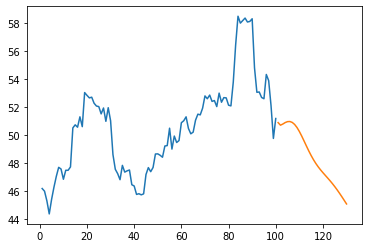

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

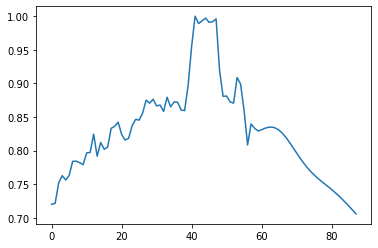

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

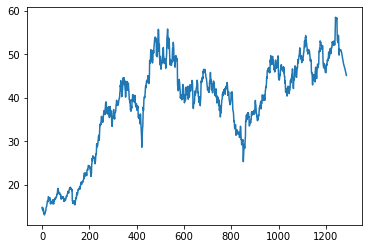

In [ ]:
plt.plot(df3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
model=DecisionTreeClassifier()
kfold_validation=KFold(10)

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,ytest,test_predict,cv=kfold_validation)
print(results)
print(np.mean(results))

[nan nan nan nan nan nan nan nan nan nan]
nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 166, in fit
    X, y, validate_separately=(check_X_params, check_y_params)
  File "/usr/local/lib/python3.7/dist-packa

In [ ]:
from sklearn.model_selection import LeaveOneOut
model=DecisionTreeClassifier()
leave_validation=LeaveOneOut()
results=cross_val_score(model,ytest,test_predict,cv=leave_validation)
results
print(np.mean(results))

nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
340 fits failed out of a total of 340.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 166, in fit
    X, y, validate_separately=(check_X_params, check_y_params)
  File "/usr/local/lib/python3.7/dist-pac